In [1]:
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf

In [3]:
model=tf.keras.Sequential

In [14]:
MNIST=tf.keras.datasets.fashion_mnist

In [15]:
(training_images,training_labels),(testing_images,test_label)=MNIST.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [16]:
import matplotlib.pyplot as plt

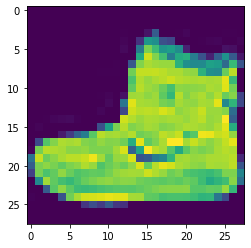

In [17]:
plt.imshow(training_images[0])

In [21]:
training_labels[0]

9

In [23]:
training_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [24]:
training_images=training_images/255

In [25]:
testing_images=testing_images/255

In [27]:
model=tf.keras.Sequential()

In [29]:
model.add(tf.keras.layers.Flatten())

In [30]:
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))

In [31]:
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [43]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [33]:
model.fit(training_images,training_labels)

1875/1875 [==============================] - 1s 522us/step - loss: 0.6426 - accuracy: 0.7750


In [35]:
model.fit(training_images,training_labels,epochs=100)

Epoch 1/100
1875/1875 [==============================] - 1s 522us/step - loss: 0.3757 - accuracy: 0.8645
Epoch 2/100
1875/1875 [==============================] - 1s 524us/step - loss: 0.3348 - accuracy: 0.8765
Epoch 3/100
1875/1875 [==============================] - 1s 521us/step - loss: 0.3155 - accuracy: 0.8856
Epoch 4/100
1875/1875 [==============================] - 1s 517us/step - loss: 0.2950 - accuracy: 0.8908
Epoch 5/100
1875/1875 [==============================] - 1s 519us/step - loss: 0.2812 - accuracy: 0.8960
Epoch 6/100
1875/1875 [==============================] - 1s 520us/step - loss: 0.2690 - accuracy: 0.8996
Epoch 7/100
1875/1875 [==============================] - 1s 525us/step - loss: 0.2579 - accuracy: 0.9045
Epoch 8/100
1875/1875 [==============================] - 1s 531us/step - loss: 0.2482 - accuracy: 0.9071
Epoch 9/100
1875/1875 [==============================] - 1s 531us/step - loss: 0.2401 - accuracy: 0.9090
Epoch 10/100
1875/1875 [==============================]

1875/1875 [==============================] - 1s 553us/step - loss: 0.0641 - accuracy: 0.9755
Epoch 79/100
1875/1875 [==============================] - 1s 544us/step - loss: 0.0655 - accuracy: 0.9750
Epoch 80/100
1875/1875 [==============================] - 1s 548us/step - loss: 0.0620 - accuracy: 0.9774
Epoch 81/100
1875/1875 [==============================] - 1s 553us/step - loss: 0.0632 - accuracy: 0.9763
Epoch 82/100
1875/1875 [==============================] - 1s 563us/step - loss: 0.0621 - accuracy: 0.9769
Epoch 83/100
1875/1875 [==============================] - 1s 558us/step - loss: 0.0607 - accuracy: 0.9772
Epoch 84/100
1875/1875 [==============================] - 1s 552us/step - loss: 0.0602 - accuracy: 0.9774
Epoch 85/100
1875/1875 [==============================] - 1s 539us/step - loss: 0.0606 - accuracy: 0.9778
Epoch 86/100
1875/1875 [==============================] - 1s 547us/step - loss: 0.0574 - accuracy: 0.9790
Epoch 87/100
1875/1875 [==============================] - 1

In [37]:
model.evaluate(testing_images,test_label)

313/313 [==============================] - 0s 396us/step - loss: 0.7777 - accuracy: 0.8854


[0.777711033821106, 0.8853999972343445]

In [38]:
class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('loss')<0.4):
            print("reached required accuracy")
            self.model.stop_training=True

In [40]:
callbacks=mycallback()